In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import keras
from keras.datasets import imdb
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense   
from keras.callbacks import EarlyStopping

In [3]:
# Version check

import keras
import tensorflow as tf

print('NumPy version :' , np.__version__)
print('Keras version :' , keras.__version__)
print('With tensorflow backend, version : ', tf.__version__ )

NumPy version : 1.14.3
Keras version 2.2.4
With tensorflow backend, version :  1.11.0


In [5]:
#Load data

(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words=12000)

In [6]:
#Check shape

x_train.shape, x_test.shape, type(x_train)

((25000,), (25000,), numpy.ndarray)

In [7]:
# Print out one encoded review

x_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,

In [8]:
# Backup labels, useful for docoding our reviews after vectorization
# Lets us verify our networks predictions

xtrain = x_train
xtest = x_test

In [9]:
# Get word indices accessable through the imdb object

word_index = imdb.get_word_index()

# Make a dictionary using the word index for decoding reviews

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [10]:

# Make a function which uses the dictionary for decoding reviews
# Agruments accept review index and data split (train/test)


def decode_review(n, split='train'):  
    
    # Adjust decoding by 3 positions, as positions 0, 1, and 2 are reserved
    
    if split=='train':
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in xtrain[n]])
        
    elif split == 'test':
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in xtest[n]])
        
    # Return decoded string
    
    return decoded_review

In [11]:

print('Traning label:',y_train[5])
decode_review(5, split='train'), 


Traning label: 0


("? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br",)

In [12]:

# Make a function to transform the list of numbers into matrix of vectors
# Accepts training and test arrays, returns vectorized matrix representation


def vectorize_features(features):
    
    dimension=12000                                         #Define the number of total words in our corpus
    
    review_vectors = np.zeros((len(features), dimension))   #make an empty 2D tensor of shape (25000,12000)
    
    for location, feature in enumerate(features):           #iterate over each review 
        
        review_vectors[location, feature] = 1.              #set the indices of our empty tensor to 1s
        
    return review_vectors


x_train = vectorize_features(x_train)
x_test = vectorize_features(x_test)


In [13]:
# Convert labels to float32 arrays 

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [14]:
#Check type and dimensions

type(x_train), x_train.shape, y_train.shape

(numpy.ndarray, (25000, 12000), (25000,))

In [15]:
#Check content of one training instance

x_train[0].shape, x_train[1], len(x_train[1])

((12000,), array([0., 1., 1., ..., 0., 0., 0.]), 12000)

In [16]:
#Build neural network

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(12000,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
#Compile network

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [18]:
# View model configuration

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72006     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 72,055
Trainable params: 72,055
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Define early stopping callback to monitor validation loss


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')

In [20]:
# Define variable to capture the model history generated by calling .fit on the model object


network_metadata = model.fit(x_train, y_train,
                             validation_data=(x_test, y_test),
                             epochs=20, 
                             batch_size=100,
                             callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 280us/step - loss: 0.4659 - acc: 0.8217 - val_loss: 0.3456 - val_acc: 0.8882
Epoch 2/20
25000/25000 [==============================] - 5s 210us/step - loss: 0.2428 - acc: 0.9202 - val_loss: 0.2880 - val_acc: 0.8862
Epoch 3/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.1787 - acc: 0.9385 - val_loss: 0.2919 - val_acc: 0.8863


In [21]:
# Will correspond to val_acc at last training epoch

model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 119us/step


[0.2918995348930359, 0.88632]

In [22]:
# Collect the history dictionary and view items stored within

history_dict = network_metadata.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
# Shows training loss for each epoch trained

history_dict['loss']

[0.4658719700574875, 0.24284798341989516, 0.17866968768835068]

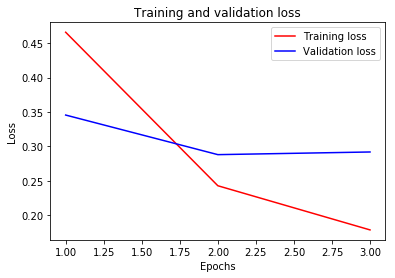

In [24]:
#Plot training and validation loss to spot overfitting

acc = history_dict['acc']                                        # Training accuracy array
loss_values = history_dict['loss']                               # Training loss array
val_loss_values = history_dict['val_loss']                       # Validation loss
epochs = range(1, len(acc) + 1)                                  # Range of epochs


plt.plot(epochs, loss_values, 'r', label='Training loss')        # Plot Training loss in red  
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # Plot val loss in blue
plt.title('Training and validation loss')                        # Give a title
plt.xlabel('Epochs')                                             # Label x axis
plt.ylabel('Loss')                                               # Label y axis
plt.legend()                                                     # Include legend
plt.show()                                                       # Show plot

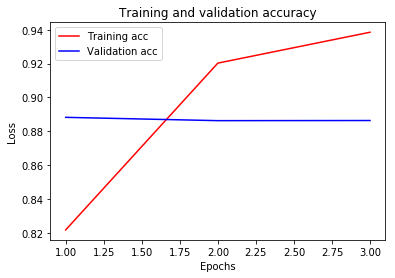

In [25]:
#Now plot training accuracy

plt.clf()                                                                   # Clear previous figure

acc_values = history_dict['acc']                                            # Training accuracy array
val_acc_values = history_dict['val_acc']                                    # Val accuracy array


plt.plot(epochs, history_dict.get('acc'), 'r', label='Training acc')        # Plot training accuracy in red
plt.plot(epochs, history_dict.get('val_acc'), 'b', label='Validation acc')  # Plot Val accuracy in blue


plt.title('Training and validation accuracy')                               # Give a title
plt.xlabel('Epochs')                                                        # Label x axis
plt.ylabel('Loss')                                                          # Label y axis
plt.legend()                                                                # Include legend
plt.show()                                                                  # Show plot

In [26]:
# Make prediction on the test set 

predictions = model.predict([x_test])

# Check a prediction of the model
predictions[5]

array([0.8569782], dtype=float32)

In [27]:
# Print label, and decode review no. 6

y_test[5], decode_review(5,split='test')

(1.0,
 "? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap download it deserves the real thing i'm them now this movie will be on dvd")

In [28]:
# Make helper function to gauge network's predictions between some simple thresholds


def gauge_predictions(n):    
    if (predictions[n] <= 0.4) and (y_test[n]==0):
        print('Network correctly predicts that review %d is negative'%(n))
        
    elif (predictions[n] <= 0.4) and (y_test[n]==1):
        print('Network falsely predicts that review %d is negative'%(n))
        
    elif (predictions[n] >= 0.7) and (y_test[n]==1):
        print('Network correctly predicts that review %d is positive'%(n))
        
    elif (predictions[n] >= 0.7) and (y_test[n]==0):
        print('Network falsely predicts that review %d is positive'%(n))
        
    else:
        print('Network is not so sure. Review no. %d has a probability score of'%(n), predictions[n])
        

In [29]:
# Make halper function which uses both the gauging function and the decoding function
# Returns network's prediction as well as decoded version of review


def verify_predictions(n):    
    return gauge_predictions(n), predictions[n], decode_review(n,split='test')

In [30]:
verify_predictions(19999)

Network is not so sure. Review no. 19999 has a probability score of [0.68728095]


(None,
 array([0.68728095], dtype=float32),
 "? this movies is really special it's about a young french who go in ? spain in order to study and in he meets other ? like him this film he's the european movies of the year so go watch it")

In [31]:
verify_predictions(22)

Network falsely predicts that review 22 is negative


(None,
 array([0.26395187], dtype=float32),
 "? how managed to avoid attention remains a mystery a potent mix of comedy and crime this one takes chances where tarantino plays it safe with the hollywood formula the risks don't always pay off one character in one sequence comes off ? silly and falls flat in the lead role thomas jane gives a wonderful and complex performance and two brief appearances by mickey rourke hint at the high potential of this much under and mis used actor here's a director one should keep one's eye on")

In [32]:
# Function to predict n number of randomly chosen reviews, and visualize predicted content 

from random import randint

def random_predict(n_reviews):
    for i in range(n_reviews):
        print()
        print(verify_predictions(randint(0, 24000)))
        print()



In [33]:
random_predict(3)


Network correctly predicts that review 18480 is positive
(None, array([0.91183215], dtype=float32), "? i read the book before i saw the movie i knew the movie was going to be good because the book was great i seriously recommend you see this amazing fantastic movie i know you will like it when i went to see it i was there with my sister and there was nobody that was with us i was a little disappointed but nobody that i know has gone in to that movie and came out saying that was a horrible movie nobody can it is so great i think everyone will like it to bad nobody wants to see it anyway i hope from what you have heard about this movie from me will make you want to see this movie i guarantee you'll like it as much as i do im obsessed i am")


Network correctly predicts that review 10795 is positive
(None, array([0.71410865], dtype=float32), "? a hundred miles away from the scene of a ? murder in small town american jill johnson belle ? in for a night of ? with the children asleep and a 